set the column name


In [10]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]


df = pd.read_csv('Adult Dataset/adult.data', names=columns, na_values=' ?', skipinitialspace=True)


print(df.head())


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

1. Remove Data with Missing Values:


In [8]:

print(df.isnull().sum())

# Remove rows with missing values
df_cleaned = df.dropna()

# Check the first few rows of the cleaned data
print(df_cleaned.head())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spo

2. Remove Outliers:

In [18]:
# Numeric columns to check for outliers
numeric_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

# Z-score threshold
z_thresh = 3

# Remove rows where any numeric columns have Z-score > 3 (outliers removed)
df_cleaned_no_outliers = df_cleaned[(np.abs(zscore(df_cleaned[numeric_cols])) < z_thresh).all(axis=1)]

# Print the shape of the dataset before and after outlier removal
print(f"Original dataset size: {df_cleaned.shape[0]} rows")
print(f"Dataset size after outlier removal: {df_cleaned_no_outliers.shape[0]} rows")
print(f"Number of outliers removed: {df_cleaned.shape[0] - df_cleaned_no_outliers.shape[0]} rows")

# Optionally, display a sample of the cleaned dataset after removing outliers
print("Sample of cleaned dataset (after removing outliers):")
print(df_cleaned_no_outliers.head())



Original dataset size: 32561 rows
Dataset size after outlier removal: 30357 rows
Number of outliers removed: 2204 rows
Sample of cleaned dataset (after removing outliers):
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital

3. Establish the Importance of Weekly Working Hours on Earning Potential

C:\Users\mogith\AppData\Local\Temp\ipykernel_15060\2002066677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_no_outliers['income_binary'] = df_cleaned_no_outliers['income'].apply(lambda x: 1 if x == '>50K' else 0)


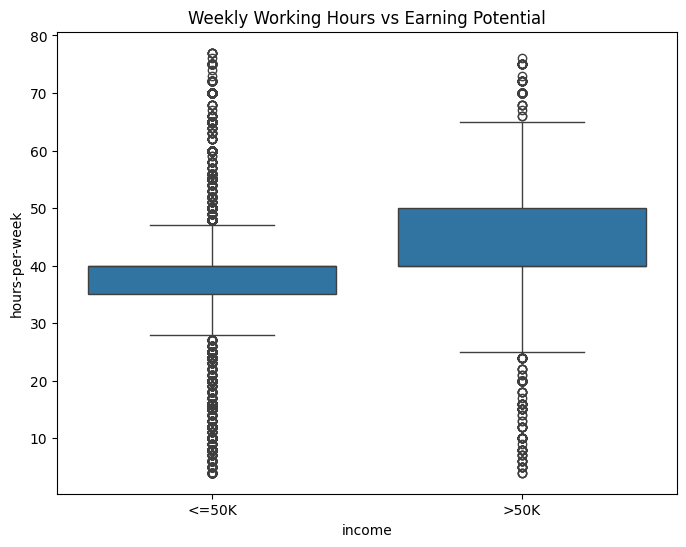

In [12]:
# Convert 'income' to binary (<=50K -> 0, >50K -> 1)
df_cleaned_no_outliers['income_binary'] = df_cleaned_no_outliers['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Plot boxplot of weekly working hours vs earning potential
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='hours-per-week', data=df_cleaned_no_outliers)
plt.title("Weekly Working Hours vs Earning Potential")
plt.show()


4. Find Features Highly Correlated with Earning Potential

C:\Users\mogith\AppData\Local\Temp\ipykernel_15060\1902875866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_no_outliers['income_binary'] = df_cleaned_no_outliers['income'].apply(lambda x: 1 if x == '>50K' else 0)


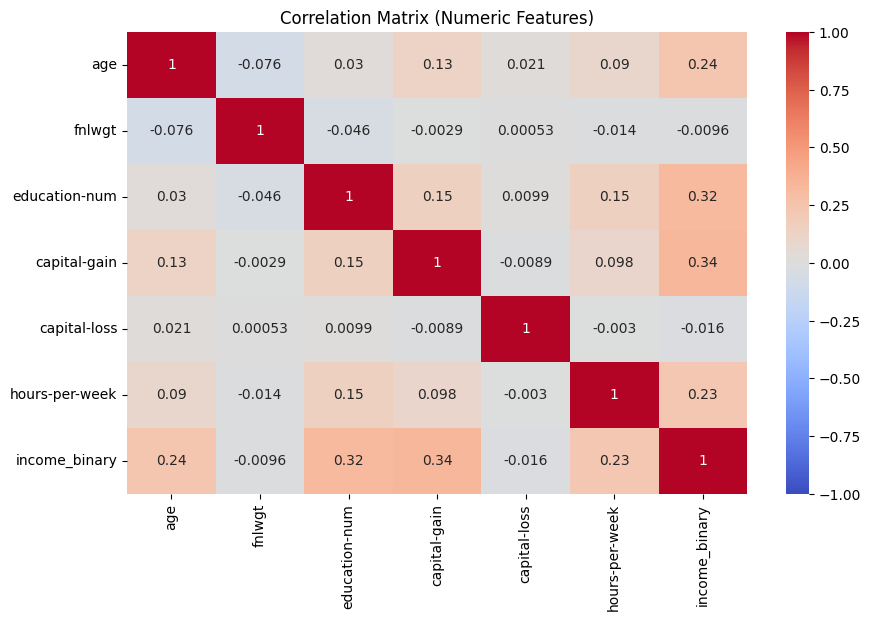

                income_binary
income_binary        1.000000
capital-gain         0.343032
education-num        0.317382
age                  0.236777
hours-per-week       0.231158
fnlwgt              -0.009644
capital-loss        -0.016369


In [24]:
# Ensure income_binary is created as a numeric column
df_cleaned_no_outliers['income_binary'] = df_cleaned_no_outliers['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Select only numeric columns for correlation analysis, including 'income_binary'
numeric_df = df_cleaned_no_outliers.select_dtypes(include=[float, int])

# Correlation matrix for numeric features only
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

# Show correlations with income_binary
print(corr_matrix[['income_binary']].sort_values(by='income_binary', ascending=False))


5. Relation Between Number of Years Spent to Get a Degree and Earning Potential:

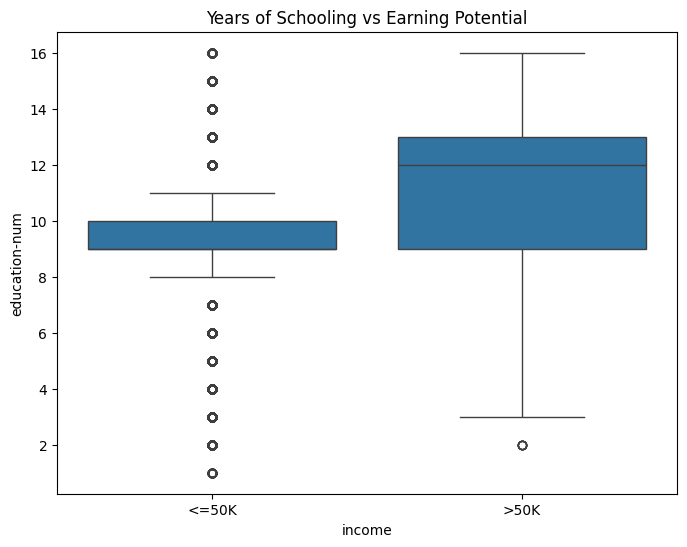

In [14]:
# Plot the relationship between education_num (years of schooling) and income
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='education-num', data=df_cleaned_no_outliers)
plt.title("Years of Schooling vs Earning Potential")
plt.show()


6. Relationship Between Age and Earning Potential:

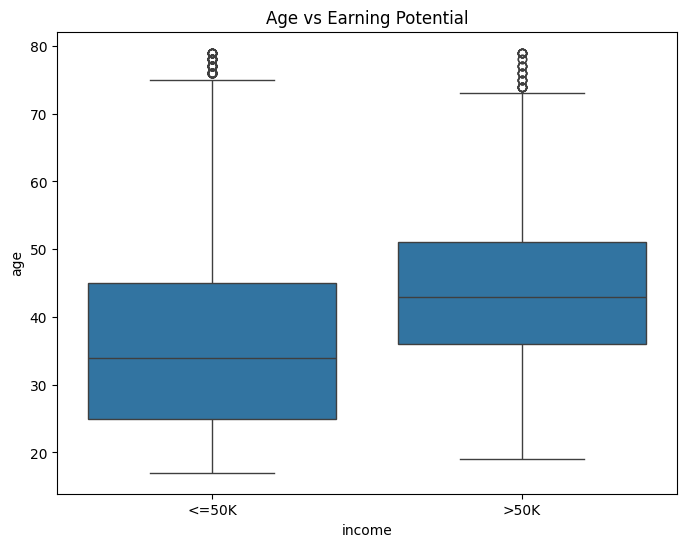

In [15]:
# Plot the relationship between age and income
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='age', data=df_cleaned_no_outliers)
plt.title("Age vs Earning Potential")
plt.show()
